In [93]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv")
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5288 non-null   int64  
 1   gender                  5288 non-null   object 
 2   pulse_rate              5288 non-null   int64  
 3   systolic_bp             5288 non-null   int64  
 4   diastolic_bp            5288 non-null   int64  
 5   glucose                 5288 non-null   float64
 6   height                  5288 non-null   float64
 7   weight                  5288 non-null   float64
 8   bmi                     5288 non-null   float64
 9   family_diabetes         5288 non-null   int64  
 10  hypertensive            5288 non-null   int64  
 11  family_hypertension     5288 non-null   int64  
 12  cardiovascular_disease  5288 non-null   int64  
 13  stroke                  5288 non-null   int64  
 14  diabetic                5288 non-null   

In [96]:
print("Checking missing values:")
print(df.isnull().sum())

Checking missing values:
age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64


In [97]:
df.duplicated().sum()

0

In [98]:
for col in ['pulse_rate','systolic_bp','diastolic_bp','glucose','height','weight','bmi']:
    Q1 = df[col].quantile(0.27)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


pulse_rate: 96 outliers
systolic_bp: 133 outliers
diastolic_bp: 66 outliers
glucose: 404 outliers
height: 193 outliers
weight: 88 outliers
bmi: 150 outliers


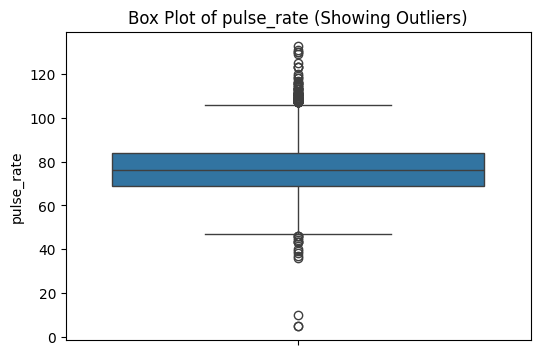

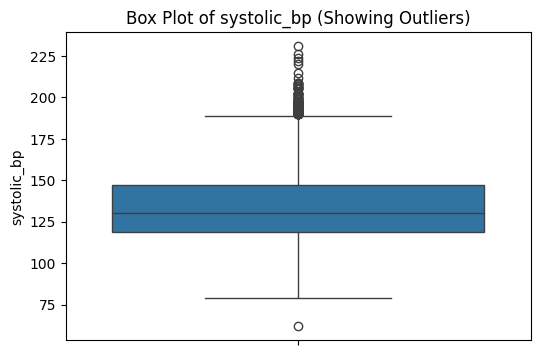

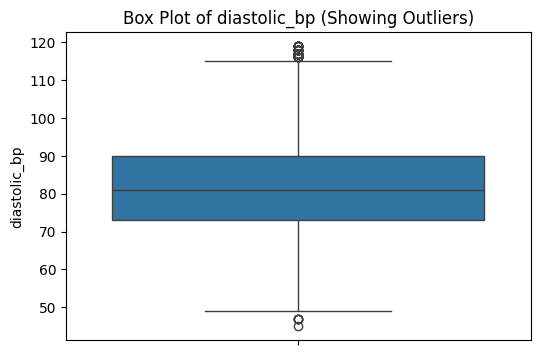

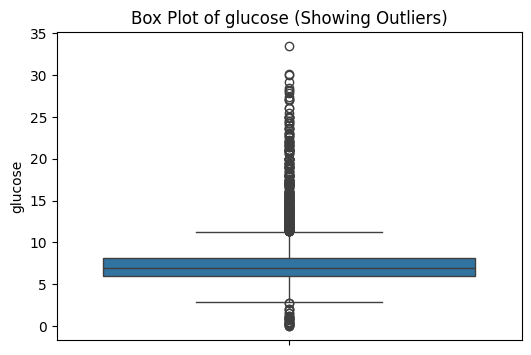

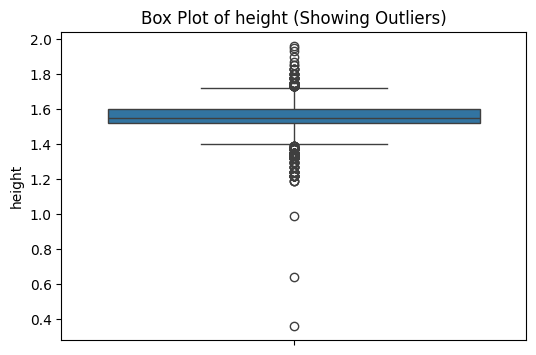

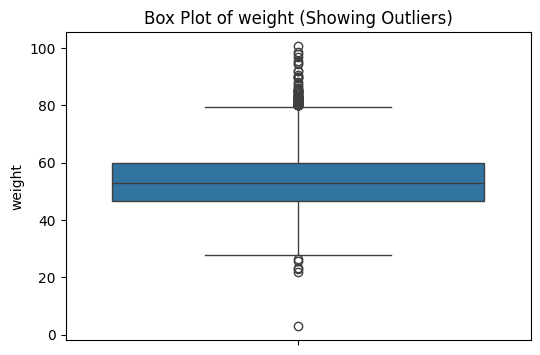

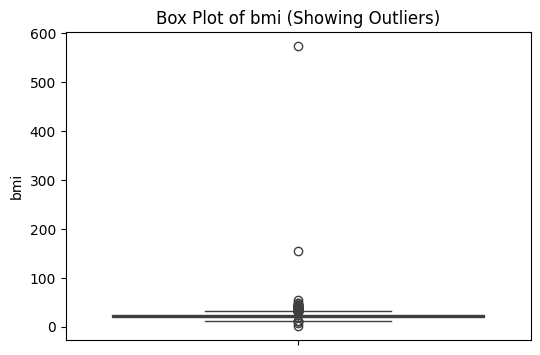

In [99]:
cols = ['pulse_rate','systolic_bp','diastolic_bp','glucose','height','weight','bmi']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col} (Showing Outliers)")
    plt.show()

In [100]:
df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,45.745651,76.626135,133.996596,82.229576,7.563922,1.548886,53.644100,22.466581,0.031959,0.111006,0.033661,0.011346,0.003782
std,13.422024,12.229319,22.231752,12.479007,2.944381,0.080328,10.076059,8.819898,0.175908,0.314169,0.180372,0.105924,0.061389
min,21.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.775000,19.620000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.930000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.130000,1.600000,59.900000,24.472500,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df['gender'].value_counts()

gender
Female    3752
Male      1536
Name: count, dtype: int64

In [102]:
df['diabetic'].value_counts()

diabetic
No     4946
Yes     342
Name: count, dtype: int64

In [103]:
diabetic_counts = df.groupby('gender')['diabetic'].value_counts()
print(diabetic_counts)

diabetic_percent = df[df['diabetic'] == 'Yes'].groupby('gender')['diabetic'].count() / df.groupby('gender')['diabetic'].count() * 100
print(diabetic_percent)


gender  diabetic
Female  No          3524
        Yes          228
Male    No          1422
        Yes          114
Name: count, dtype: int64
gender
Female    6.076759
Male      7.421875
Name: diabetic, dtype: float64


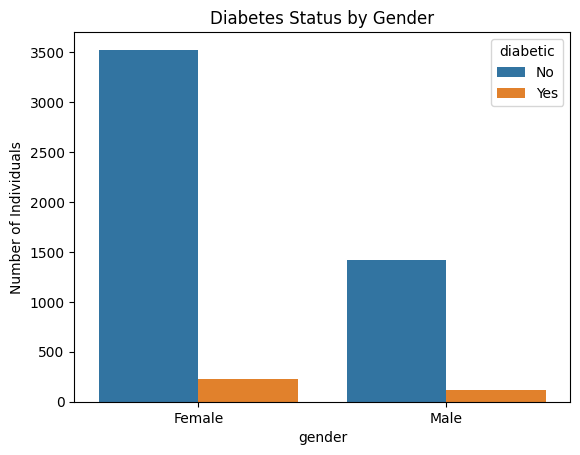

In [104]:
sns.countplot(x='gender', hue='diabetic', data=df)
plt.title("Diabetes Status by Gender")
plt.ylabel("Number of Individuals")
plt.show()

In [105]:
# Glucose
df.loc[df['glucose'] == 0, 'glucose'] = df['glucose'].median()

# Weight & BMI
df = df[df['weight'] < 150]
df = df[df['bmi'] < 60]

# Height
df.loc[df['height'] < 1, 'height'] = df['height'].median()

# Pulse rate
df.loc[df['pulse_rate'] < 30, 'pulse_rate'] = 76

# Blood Pressure
df['systolic_bp'] = df['systolic_bp'].clip(80, 200)
df['diastolic_bp'] = df['diastolic_bp'].clip(50, 120)


In [106]:
for col in ['pulse_rate','systolic_bp','diastolic_bp','glucose','height','weight','bmi']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

pulse_rate: 93 outliers
systolic_bp: 111 outliers
diastolic_bp: 49 outliers
glucose: 399 outliers
height: 190 outliers
weight: 79 outliers
bmi: 131 outliers


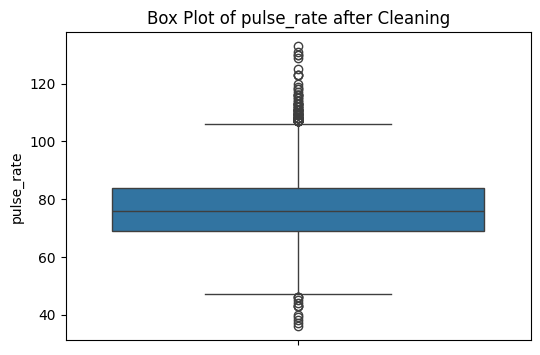

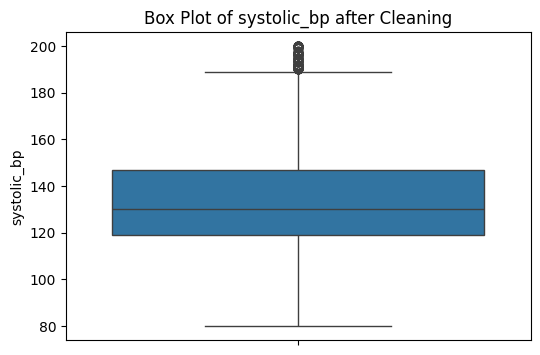

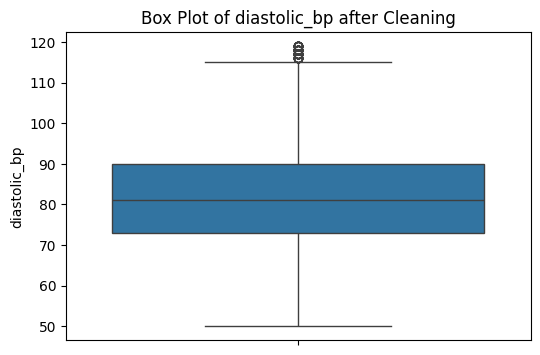

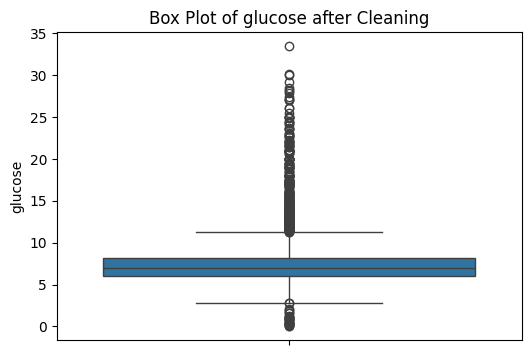

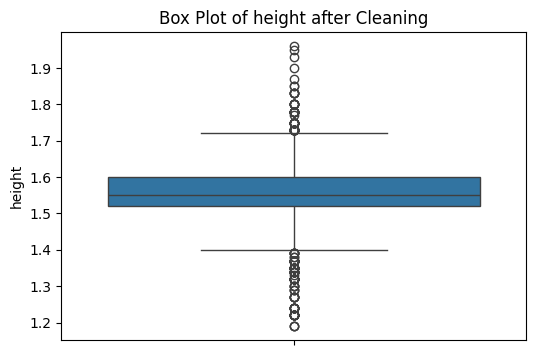

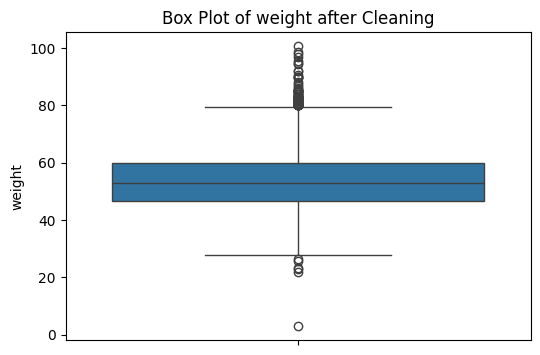

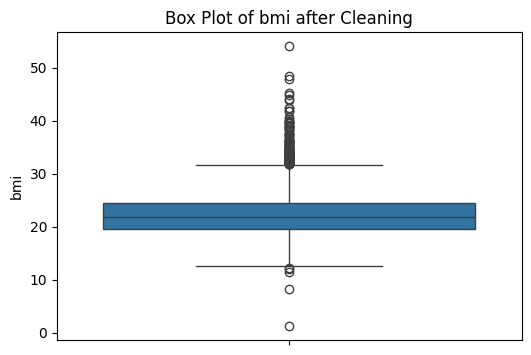

In [107]:

cols = ['pulse_rate','systolic_bp','diastolic_bp','glucose','height','weight','bmi']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col} after Cleaning")
    plt.show()

In [108]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)


In [109]:
def age_group(age):
    if age < 30:
        return "<30"
    elif age < 45:
        return "30-44"
    elif age < 60:
        return "45-59"
    else:
        return "60+"

df['age_group'] = df['age'].apply(age_group)


In [110]:
df['bp_mean'] = (df['systolic_bp'] + df['diastolic_bp']) / 2

df['family_risk'] = df['family_diabetes'] + df['family_hypertension']


In [111]:

le = LabelEncoder()

categorical_cols = ['gender', 'bmi_category', 'age_group', 'diabetic']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic,bmi_category,age_group,bp_mean,family_risk
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0,2,0,91.5,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0,0,0,96.5,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0,0,2,100.5,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0,0,2,152.5,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0,3,2,115.5,0


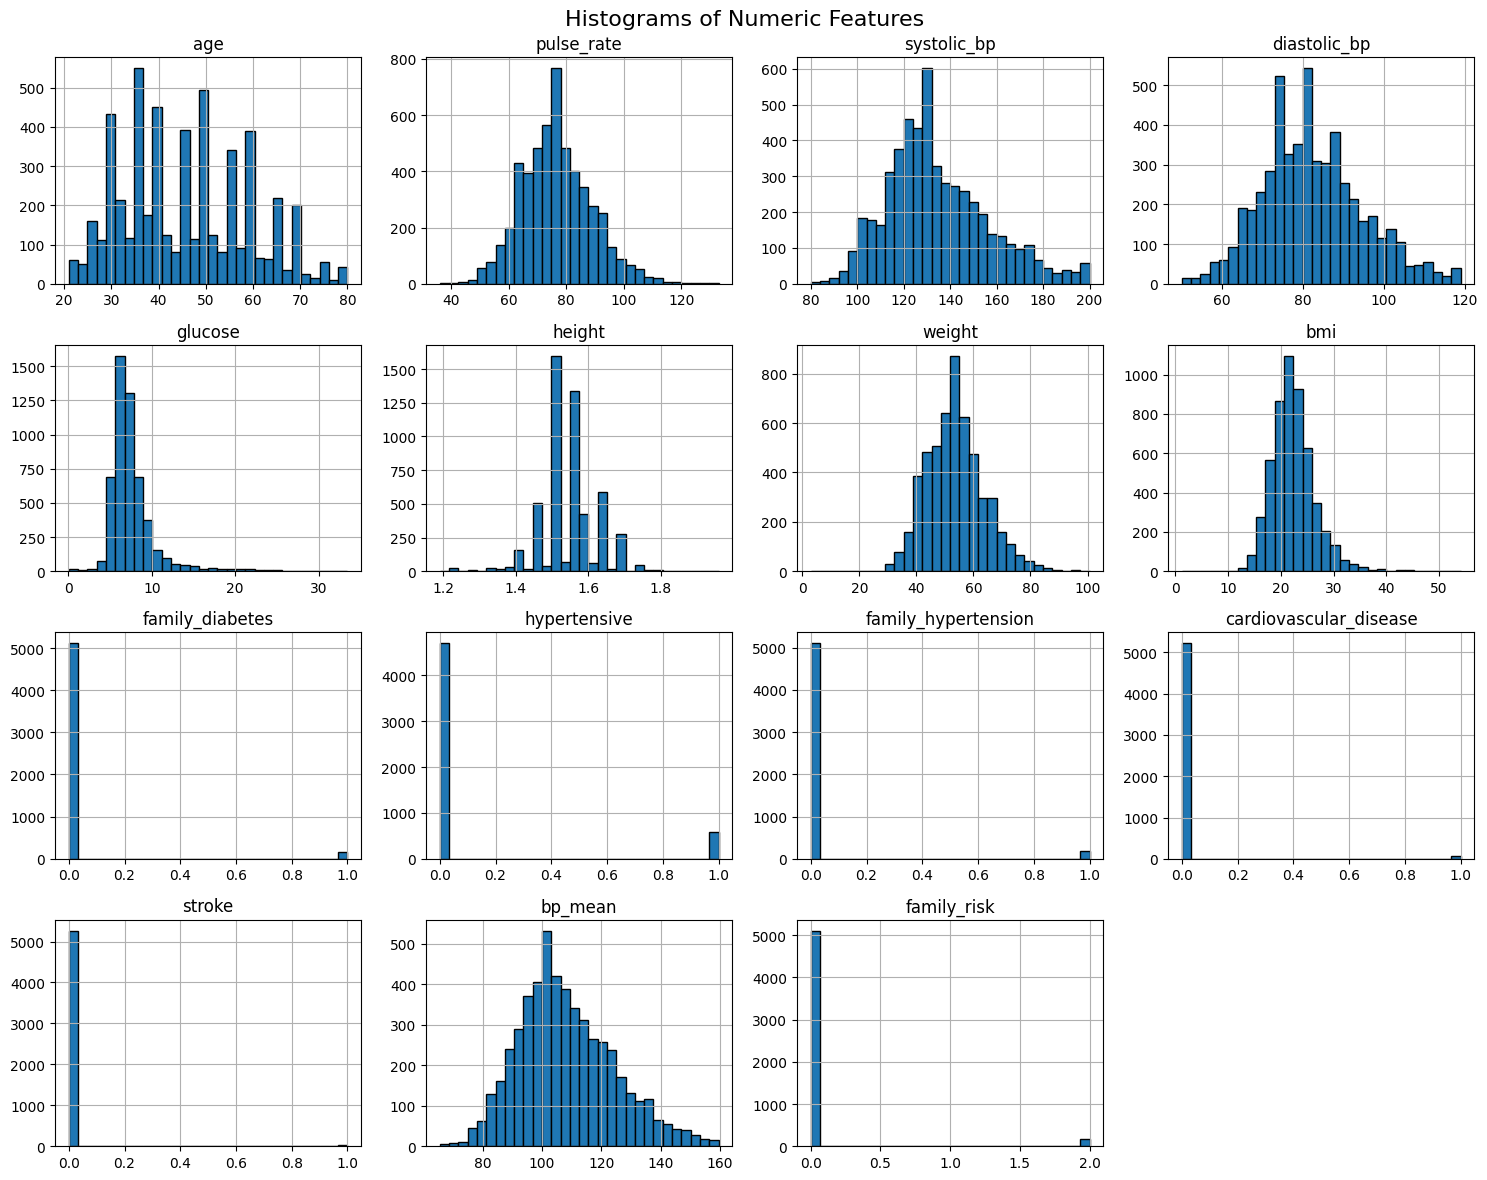

In [112]:
# assuming your DataFrame is called df
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# plot histograms
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

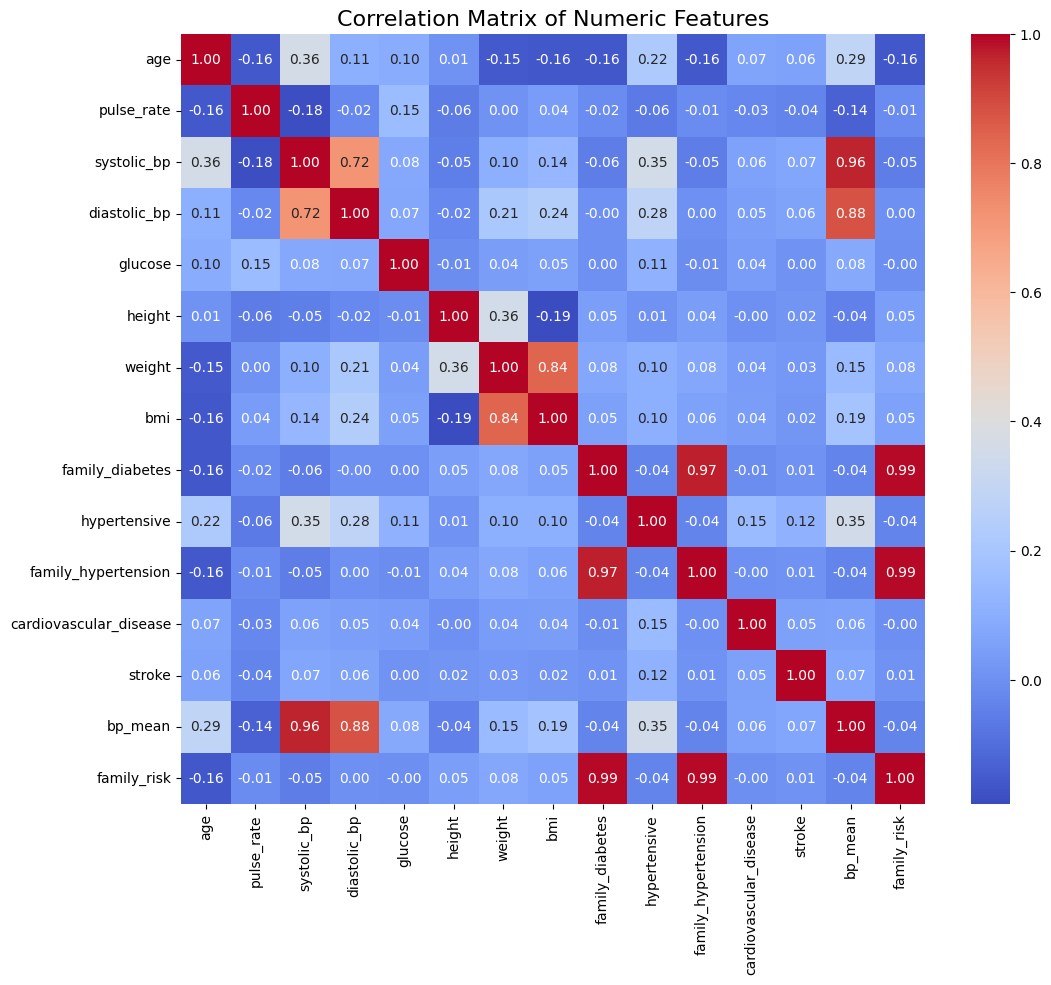

In [113]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

In [114]:
X = df.drop('diabetic', axis=1)
y = df['diabetic']

X_rf = X.copy()

X_lr = X.copy()

In [115]:
numeric_cols = ['age','pulse_rate','systolic_bp','diastolic_bp','glucose',
                'height','weight','bmi','bp_mean','family_risk']

scaler = StandardScaler()
X_lr[numeric_cols] = scaler.fit_transform(X_lr[numeric_cols])

In [116]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(
    X_lr, y, test_size=0.2, random_state=42, stratify=y
)

X_train_rf, X_test_rf, y_train, y_test = train_test_split(
    X_rf, y, test_size=0.2, random_state=42, stratify=y
)

In [117]:
smote = SMOTE(random_state=42)

X_train_lr_sm, y_train_sm = smote.fit_resample(X_train_lr, y_train)

X_train_rf_sm, y_train_sm_rf = smote.fit_resample(X_train_rf, y_train)

### KNN

In [118]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=5)
knn.fit(X_train_lr_sm, y_train_sm)
y_pred_knn = knn.predict(X_test_lr)

### Logistic Regression

In [119]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_lr_sm, y_train_sm)
y_pred_lr = lr.predict(X_test_lr)

### Random forest

In [120]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_rf_sm, y_train_sm_rf)
y_pred_rf = rf_model.predict(X_test_rf)

feature_order = X_train_lr.columns

In [121]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Confusion Matrix:
[[822 168]
 [ 26  42]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       990
           1       0.20      0.62      0.30        68

    accuracy                           0.82      1058
   macro avg       0.58      0.72      0.60      1058
weighted avg       0.92      0.82      0.86      1058

KNN Confusion Matrix:
[[838 152]
 [ 34  34]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       990
           1       0.18      0.50      0.27        68

    accuracy                           0.82      1058
   macro avg       0.57      0.67      0.58      1058
weighted avg       0.91      0.82      0.86      1058

Random Forest Confusion Matrix:
[[945  45]
 [ 46  22]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       990
           1       0.33      0.32      0.33        68

    accuracy         

In [122]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'KNN Score: {accuracy_knn}')
print(f'Logistic Regression Score: {accuracy_lr}')
print(f'Random forest Score: {accuracy_rf}')

KNN Score: 0.8241965973534972
Logistic Regression Score: 0.8166351606805293
Random forest Score: 0.9139886578449905


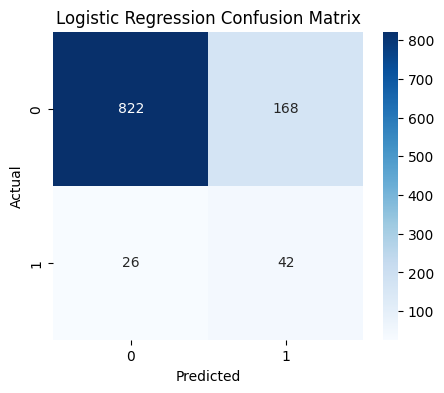

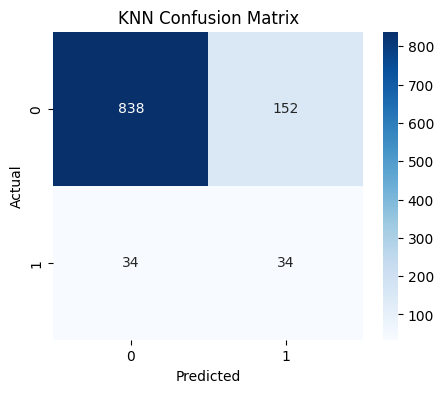

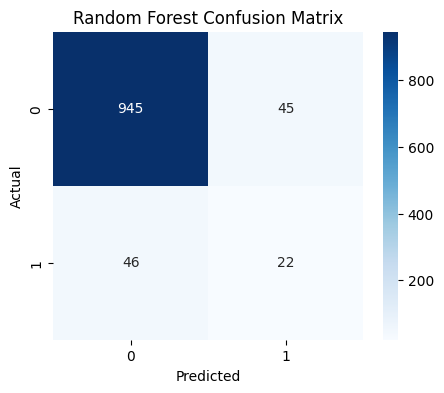

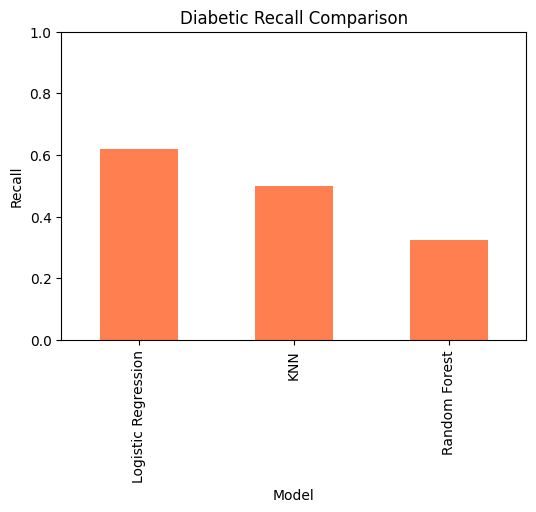

In [123]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Plot for each model
plot_confusion(y_test, y_pred_lr, "Logistic Regression")
plot_confusion(y_test, y_pred_knn, "KNN")
plot_confusion(y_test, y_pred_rf, "Random Forest")

metrics_dict = {
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Recall (Diabetic)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_knn, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]
    ]
}

df_metrics = pd.DataFrame(metrics_dict)
df_metrics.plot(x="Model", y="Recall (Diabetic)", kind="bar", figsize=(6,4), color="coral", legend=False, ylim=(0,1))
plt.ylabel("Recall")
plt.title("Diabetic Recall Comparison")
plt.show()

In [124]:
recalls = {
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
    "KNN": classification_report(y_test, y_pred_knn, output_dict=True)["1"]["recall"],
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]
}

best_model = max(recalls, key=recalls.get)
best_recall = recalls[best_model]

print("Best model (highest diabetic recall):", best_model)
print("Recall (Diabetic):", best_recall)


Best model (highest diabetic recall): Logistic Regression
Recall (Diabetic): 0.6176470588235294


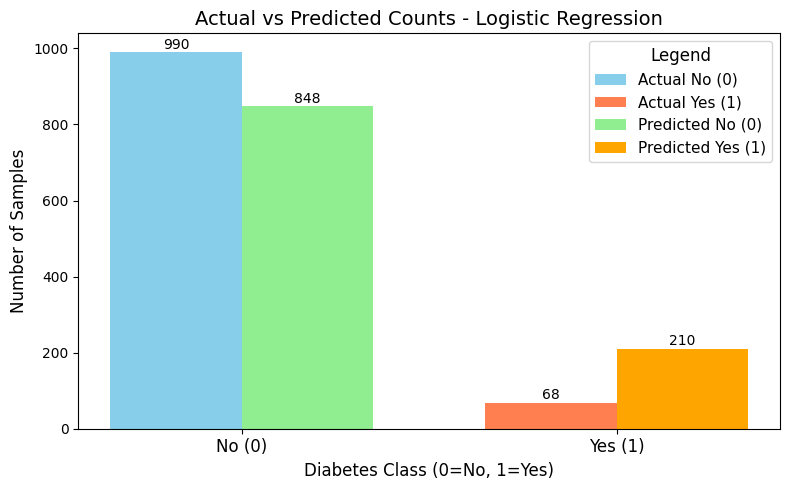

In [125]:
best_model_name = "Logistic Regression"
best_preds = y_pred_lr
y_actual = y_test.values

counts_actual = [np.sum(y_actual == 0), np.sum(y_actual == 1)]
counts_predicted = [np.sum(best_preds == 0), np.sum(best_preds == 1)]

labels = ["No (0)", "Yes (1)"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

bars_actual = ax.bar(x - width/2, counts_actual, width, color=["skyblue","coral"])
bars_pred = ax.bar(x + width/2, counts_predicted, width, color=["lightgreen","orange"])

for bar_group in [bars_actual, bars_pred]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
                ha='center', va='bottom', fontsize=10)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_xlabel("Diabetes Class (0=No, 1=Yes)", fontsize=12)
ax.set_ylabel("Number of Samples", fontsize=12)
ax.set_title(f"Actual vs Predicted Counts - {best_model_name}", fontsize=14)

ax.legend(
    [bars_actual[0], bars_actual[1], bars_pred[0], bars_pred[1]],
    ["Actual No (0)", "Actual Yes (1)", "Predicted No (0)", "Predicted Yes (1)"],
    title="Legend", fontsize=11, title_fontsize=12, loc="upper right"
)

plt.tight_layout()
plt.show()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5286 entries, 0 to 5287
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5286 non-null   int64  
 1   gender                  5286 non-null   int32  
 2   pulse_rate              5286 non-null   int64  
 3   systolic_bp             5286 non-null   int64  
 4   diastolic_bp            5286 non-null   int64  
 5   glucose                 5286 non-null   float64
 6   height                  5286 non-null   float64
 7   weight                  5286 non-null   float64
 8   bmi                     5286 non-null   float64
 9   family_diabetes         5286 non-null   int64  
 10  hypertensive            5286 non-null   int64  
 11  family_hypertension     5286 non-null   int64  
 12  cardiovascular_disease  5286 non-null   int64  
 13  stroke                  5286 non-null   int64  
 14  diabetic                5286 non-null   int32

In [127]:
# age: 45
# gender: 1
# pulse_rate: 78
# systolic_bp: 130
# diastolic_bp: 85
# glucose: 140.0
# height: 170.0
# weight: 75.0
# bmi: 25.95
# family_diabetes: 1
# hypertensive: 0
# family_hypertension: 1
# cardiovascular_disease: 0
# stroke: 0
# bmi_category: 2
# age_group: 3
# bp_mean: 97.5
# family_risk: 1

In [128]:
# # DIAGNOSTIC CODE - Run this to see what's happening

# print("="*50)
# print("DEBUGGING YOUR MODEL")
# print("="*50)

# # 1. Check what the model learned
# print("\n1. Model Coefficients:")
# print("Feature coefficients:", dict(zip(feature_order, lr.coef_[0])))
# print("Intercept:", lr.intercept_)

# # 2. Check training data distribution
# print("\n2. Training Data Class Distribution:")
# print("y_train_sm distribution:")
# print(pd.Series(y_train_sm).value_counts())
# print(f"Percentage diabetic: {(y_train_sm == 1).sum() / len(y_train_sm) * 100:.2f}%")

# # 3. Test the model on test data
# print("\n3. Model Performance on Test Set:")
# test_predictions = lr.predict(X_test_lr)
# print(f"Test set - Predicted diabetic: {(test_predictions == 1).sum()} / {len(test_predictions)}")
# print(f"Test set - Actual diabetic: {(y_test == 1).sum()} / {len(y_test)}")

# # 4. Check your example patient data BEFORE scaling
# print("\n4. Example Patient BEFORE Scaling:")
# example_patient_df = pd.DataFrame([example_patient])
# print(example_patient_df[numeric_cols])

# # 5. Check your example patient data AFTER scaling
# example_patient_df_scaled = example_patient_df.copy()
# example_patient_df_scaled = example_patient_df_scaled.reindex(columns=feature_order, fill_value=0)
# example_patient_df_scaled[numeric_cols] = scaler.transform(example_patient_df_scaled[numeric_cols])
# print("\n5. Example Patient AFTER Scaling:")
# print(example_patient_df_scaled[numeric_cols])

# # 6. Make prediction with details
# print("\n6. Prediction Details:")
# prediction = lr.predict(example_patient_df_scaled)[0]
# probabilities = lr.predict_proba(example_patient_df_scaled)[0]
# decision_function = lr.decision_function(example_patient_df_scaled)[0]

# print(f"Prediction: {prediction} ({'Diabetic' if prediction == 1 else 'Non-diabetic'})")
# print(f"Probability [Non-diabetic, Diabetic]: {probabilities}")
# print(f"Decision function value: {decision_function}")

# # 7. Try a few test set samples to verify model works
# print("\n7. Testing with actual test samples:")
# for i in range(3):
#     sample_pred = lr.predict(X_test_lr.iloc[i:i+1])[0]
#     sample_actual = y_test.iloc[i]
#     sample_prob = lr.predict_proba(X_test_lr.iloc[i:i+1])[0][1]
#     print(f"Sample {i}: Predicted={sample_pred}, Actual={sample_actual}, Prob={sample_prob:.2%}")

In [142]:
print("="*60)
print("DIABETES RISK PREDICTION SYSTEM")
print("="*60)
print("\nPlease enter patient details:\n")

# Get user inputs
age = int(input("Age (years): "))
gender = int(input("Gender (0=Female, 1=Male): "))
pulse_rate = int(input("Pulse Rate (bpm): "))
systolic_bp = int(input("Systolic Blood Pressure (mmHg): "))
diastolic_bp = int(input("Diastolic Blood Pressure (mmHg): "))
glucose = float(input("Glucose Level (mmol/L, e.g., 8.5): "))
height = float(input("Height (meters, e.g., 1.70): "))
weight = float(input("Weight (kg): "))
bmi = float(input("BMI: "))
family_diabetes = int(input("Family History of Diabetes (0=No, 1=Yes): "))
hypertensive = int(input("Hypertensive (0=No, 1=Yes): "))
family_hypertension = int(input("Family History of Hypertension (0=No, 1=Yes): "))
cardiovascular_disease = int(input("Cardiovascular Disease (0=No, 1=Yes): "))
stroke = int(input("History of Stroke (0=No, 1=Yes): "))

# Calculate derived features
bp_mean = (systolic_bp + diastolic_bp) / 2
family_risk = family_diabetes + family_hypertension

# Determine BMI category (encoded)
if bmi < 18.5:
    bmi_category = 3  # Underweight
elif bmi < 25:
    bmi_category = 1  # Normal
elif bmi < 30:
    bmi_category = 2  # Overweight
else:
    bmi_category = 0  # Obese

# Determine age group (encoded)
if age < 30:
    age_group = 0  # <30
elif age < 45:
    age_group = 1  # 30-44
elif age < 60:
    age_group = 2  # 45-59
else:
    age_group = 3  # 60+

# Create patient dictionary
patient = {
    'age': age,
    'gender': gender,
    'pulse_rate': pulse_rate,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp,
    'glucose': glucose,
    'height': height,
    'weight': weight,
    'bmi': bmi,
    'family_diabetes': family_diabetes,
    'hypertensive': hypertensive,
    'family_hypertension': family_hypertension,
    'cardiovascular_disease': cardiovascular_disease,
    'stroke': stroke,
    'bmi_category': bmi_category,
    'age_group': age_group,
    'bp_mean': bp_mean,
    'family_risk': family_risk
}

# Prepare data for prediction
user_df = pd.DataFrame([patient])
user_df = user_df.reindex(columns=feature_order, fill_value=0)
user_df[numeric_cols] = scaler.transform(user_df[numeric_cols])

# Make prediction
prediction = lr.predict(user_df)[0]
probability = lr.predict_proba(user_df)[0][1]

# Display results
print("\n" + "="*60)
print("PATIENT DETAILS SUMMARY")
print("="*60)
print(f"Age: {age} years")
print(f"Gender: {'Male' if gender == 1 else 'Female'}")
print(f"Pulse Rate: {pulse_rate} bpm")
print(f"Blood Pressure: {systolic_bp}/{diastolic_bp} mmHg")
print(f"Glucose Level: {glucose} mmol/L")
print(f"Height: {height} m")
print(f"Weight: {weight} kg")
print(f"BMI: {bmi}")
print(f"Family History of Diabetes: {'Yes' if family_diabetes == 1 else 'No'}")
print(f"Hypertensive: {'Yes' if hypertensive == 1 else 'No'}")
print(f"Family History of Hypertension: {'Yes' if family_hypertension == 1 else 'No'}")
print(f"Cardiovascular Disease: {'Yes' if cardiovascular_disease == 1 else 'No'}")
print(f"History of Stroke: {'Yes' if stroke == 1 else 'No'}")

print("\n" + "="*60)
print("PREDICTION RESULTS")
print("="*60)
print(f"Prediction: {('DIABETIC' if prediction == 1 else 'NON-DIABETIC')}")
print(f"Diabetes Risk Probability: {round(probability * 100, 2)}%")

# Risk category
if probability < 0.3:
    risk_level = "LOW RISK"
    color = "✅"
elif probability < 0.6:
    risk_level = "MODERATE RISK"
    color = "⚠️"
else:
    risk_level = "HIGH RISK"
    color = "❌"

print(f"Risk Level: {color} {risk_level}")
print("="*60)

DIABETES RISK PREDICTION SYSTEM

Please enter patient details:


PATIENT DETAILS SUMMARY
Age: 58 years
Gender: Male
Pulse Rate: 88 bpm
Blood Pressure: 155/95 mmHg
Glucose Level: 12.5 mmol/L
Height: 1.68 m
Weight: 92.0 kg
BMI: 32.6
Family History of Diabetes: Yes
Hypertensive: Yes
Family History of Hypertension: Yes
Cardiovascular Disease: No
History of Stroke: No

PREDICTION RESULTS
Prediction: DIABETIC
Diabetes Risk Probability: 96.33%
Risk Level: ❌ HIGH RISK


##### None-Diabetic person

In [137]:
"""
Age (years): 22
Gender (0=Female, 1=Male): 0
Pulse Rate (bpm): 68
Systolic Blood Pressure (mmHg): 110
Diastolic Blood Pressure (mmHg): 70
Glucose Level (mmol/L, e.g., 8.5): 5.2
Height (meters, e.g., 1.70): 1.65
Weight (kg): 58
BMI: 21.3
Family History of Diabetes (0=No, 1=Yes): 0
Hypertensive (0=No, 1=Yes): 0
Family History of Hypertension (0=No, 1=Yes): 0
Cardiovascular Disease (0=No, 1=Yes): 0
History of Stroke (0=No, 1=Yes): 0
"""
# Expected Output:
# Prediction: NON-DIABETIC
# Diabetes Risk Probability: ~10-25%
# Risk Level: ✓ LOW RISK

'\nAge (years): 22\nGender (0=Female, 1=Male): 0\nPulse Rate (bpm): 68\nSystolic Blood Pressure (mmHg): 110\nDiastolic Blood Pressure (mmHg): 70\nGlucose Level (mmol/L, e.g., 8.5): 5.2\nHeight (meters, e.g., 1.70): 1.65\nWeight (kg): 58\nBMI: 21.3\nFamily History of Diabetes (0=No, 1=Yes): 0\nHypertensive (0=No, 1=Yes): 0\nFamily History of Hypertension (0=No, 1=Yes): 0\nCardiovascular Disease (0=No, 1=Yes): 0\nHistory of Stroke (0=No, 1=Yes): 0\n'

##### Diabetic person

In [138]:
# Copy-paste these values when prompted:
"""
Age (years): 58
Gender (0=Female, 1=Male): 1
Pulse Rate (bpm): 88
Systolic Blood Pressure (mmHg): 155
Diastolic Blood Pressure (mmHg): 95
Glucose Level (mmol/L, e.g., 8.5): 12.5
Height (meters, e.g., 1.70): 1.68
Weight (kg): 92
BMI: 32.6
Family History of Diabetes (0=No, 1=Yes): 1
Hypertensive (0=No, 1=Yes): 1
Family History of Hypertension (0=No, 1=Yes): 1
Cardiovascular Disease (0=No, 1=Yes): 0
History of Stroke (0=No, 1=Yes): 0
"""
# Expected Output:
# Prediction: DIABETIC
# Diabetes Risk Probability: ~75-95%
# Risk Level: ✗ HIGH RISK

'\nAge (years): 58\nGender (0=Female, 1=Male): 1\nPulse Rate (bpm): 88\nSystolic Blood Pressure (mmHg): 155\nDiastolic Blood Pressure (mmHg): 95\nGlucose Level (mmol/L, e.g., 8.5): 12.5\nHeight (meters, e.g., 1.70): 1.68\nWeight (kg): 92\nBMI: 32.6\nFamily History of Diabetes (0=No, 1=Yes): 1\nHypertensive (0=No, 1=Yes): 1\nFamily History of Hypertension (0=No, 1=Yes): 1\nCardiovascular Disease (0=No, 1=Yes): 0\nHistory of Stroke (0=No, 1=Yes): 0\n'